In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

### General Exploratory Data Analysis 

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print("Initial shape (rows & columns):", df.shape)

Initial shape (rows & columns): (8807, 12)


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


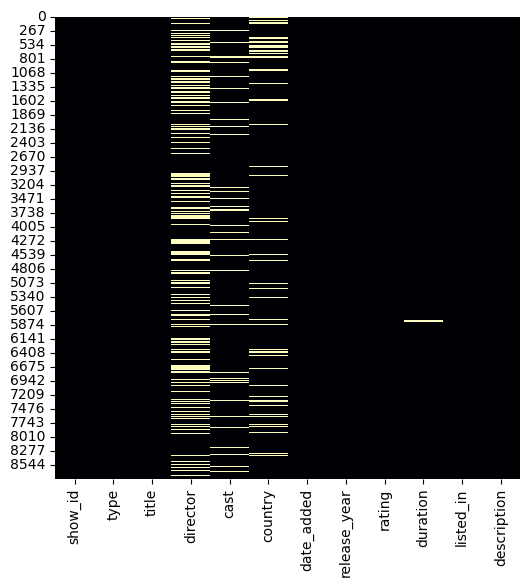

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),cbar=False,cmap="magma")
plt.show()

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.loc[:,"director"] = df["director"].fillna("unknown")
df.loc[:,"cast"] = df["cast"].fillna("unknown")
df.loc[:,"country"] = df["country"].fillna("unavailable")


In [12]:
df = df.dropna(subset=["date_added"])

In [13]:
df.loc[:,"rating"] = df["rating"].fillna("Unrated")

In [14]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unavailable,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

### Movies vs TV Shows

In [16]:
# Separate movies and TV shows
df['duration_minutes'] = np.where(
    df['type'] == 'Movie',
    df['duration'].str.replace(' min', '', regex=False),
    np.nan
)

df['seasons'] = np.where(
    df['type'] == 'TV Show',
    df['duration'].str.replace(' Seasons', '', regex=False)
                 .str.replace(' Season', '', regex=False),
    np.nan
)

# Convert to numeric
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'])
df['seasons'] = pd.to_numeric(df['seasons'])


In [17]:
split_column = [
    "type", 
    "duration", 
    "duration_minutes", 
    "seasons"
]

print(df[split_column].head(10))

      type   duration  duration_minutes  seasons
0    Movie     90 min              90.0      NaN
1  TV Show  2 Seasons               NaN      2.0
2  TV Show   1 Season               NaN      1.0
3  TV Show   1 Season               NaN      1.0
4  TV Show  2 Seasons               NaN      2.0
5  TV Show   1 Season               NaN      1.0
6    Movie     91 min              91.0      NaN
7    Movie    125 min             125.0      NaN
8  TV Show  9 Seasons               NaN      9.0
9    Movie    104 min             104.0      NaN


In [18]:
df['main_genre'] = df['listed_in'].str.split(',').str[0]


In [19]:
df['main_country'] = df['country'].str.split(',').str[0]

In [20]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,seasons,main_genre,main_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,Documentaries,United States
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,International TV Shows,South Africa


In [21]:
df["type"].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

Text(0, 0.5, 'Number of Shows')

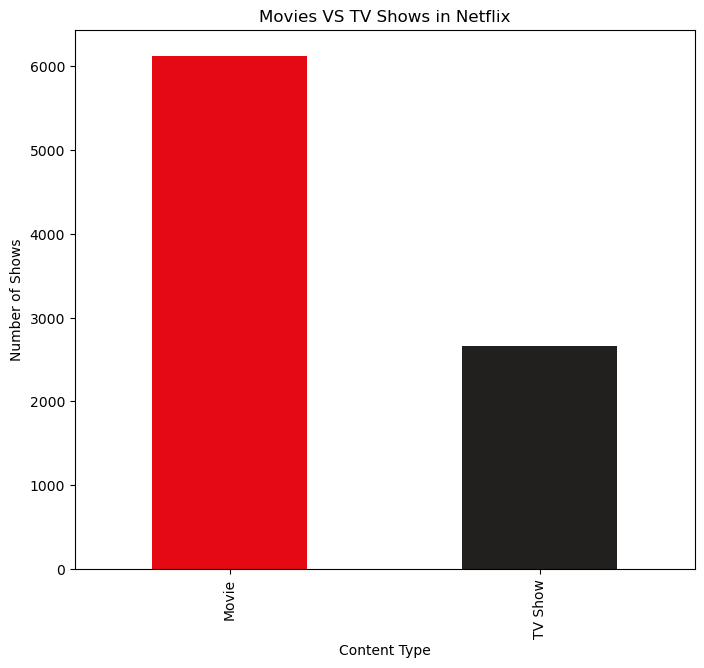

In [22]:
df["type"].value_counts().plot(
    kind='bar',
    figsize=(8,7),
    color=['#E50914', '#221F1F']
)
plt.title('Movies VS TV Shows in Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Shows')


### Movies & TV Shows Rlease Years

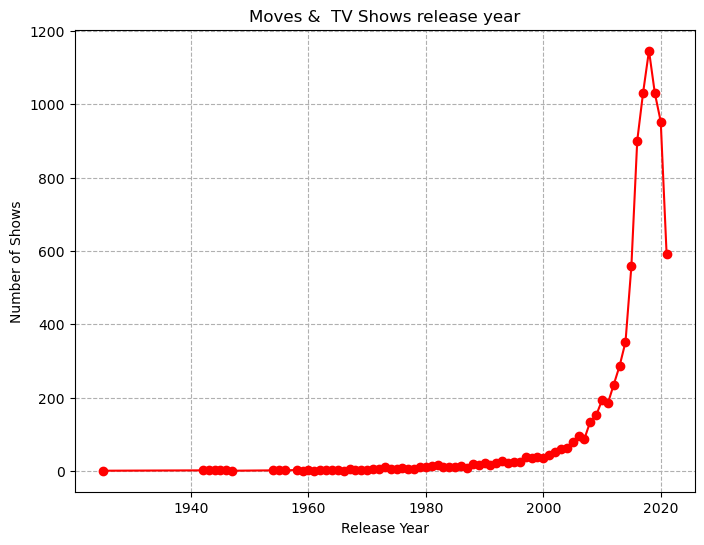

In [23]:
netflix_growth = df.groupby('release_year').size()

netflix_growth.plot(
    kind='line',
    color='Red',
    figsize=(8,6),
    marker='o',
)
plt.title('Moves &  TV Shows release year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True,linestyle='--')

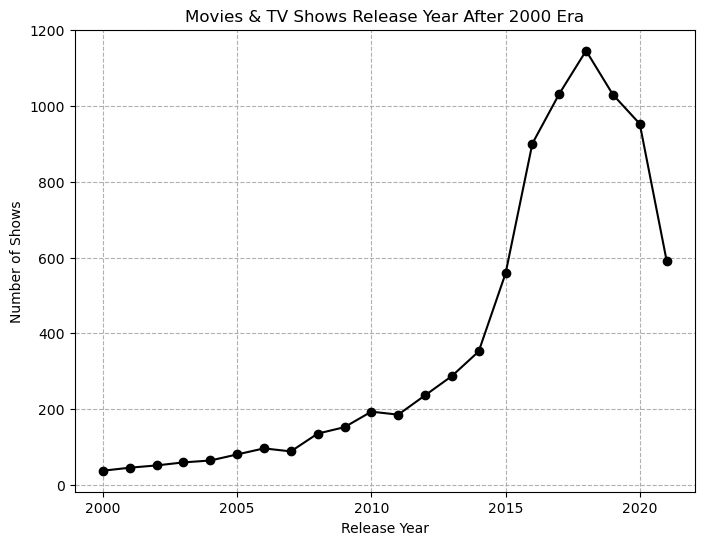

In [24]:
new_era = df[df['release_year']>=2000].groupby('release_year').size()
new_era.plot(
    kind='line',
    color='Black',
    figsize=(8,6),
    marker='o'
)
plt.title('Movies & TV Shows Release Year After 2000 Era')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True,linestyle='--')

### TOP 10 COUNTRY which produces most Movies & TV Shows

In [25]:
top_country=df['main_country'].value_counts()
top_country.head(10)

main_country
United States     3205
India             1008
unavailable        830
United Kingdom     627
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64

Text(0, 0.5, 'Number of Content')

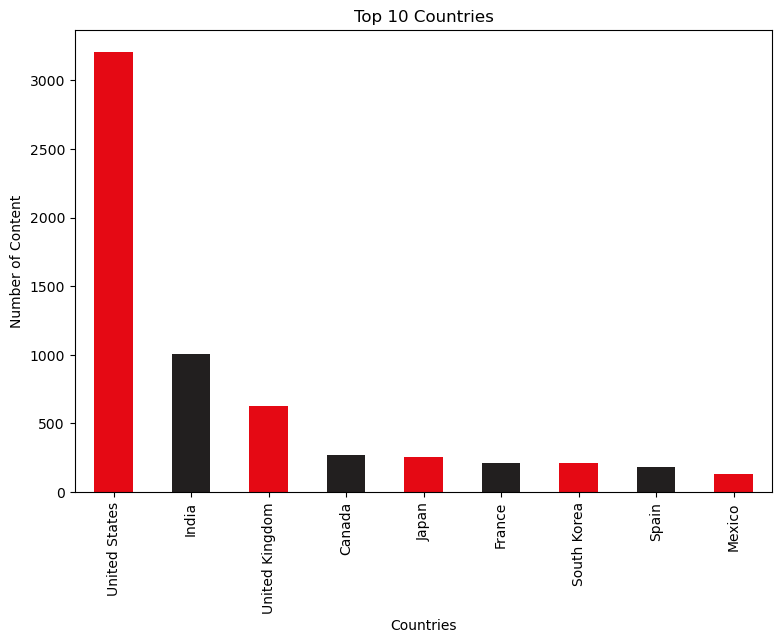

In [26]:
top_country.head(10).drop('unavailable').plot(
    kind='bar',
    figsize=(9,6),
    color=['#E50914', '#221F1F']
)
plt.title('Top 10 Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Content')

### Top Genera

In [27]:
top_generas=df['main_genre'].value_counts().head(10)
top_generas

main_genre
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       773
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     386
Stand-Up Comedy              334
Horror Movies                275
Name: count, dtype: int64

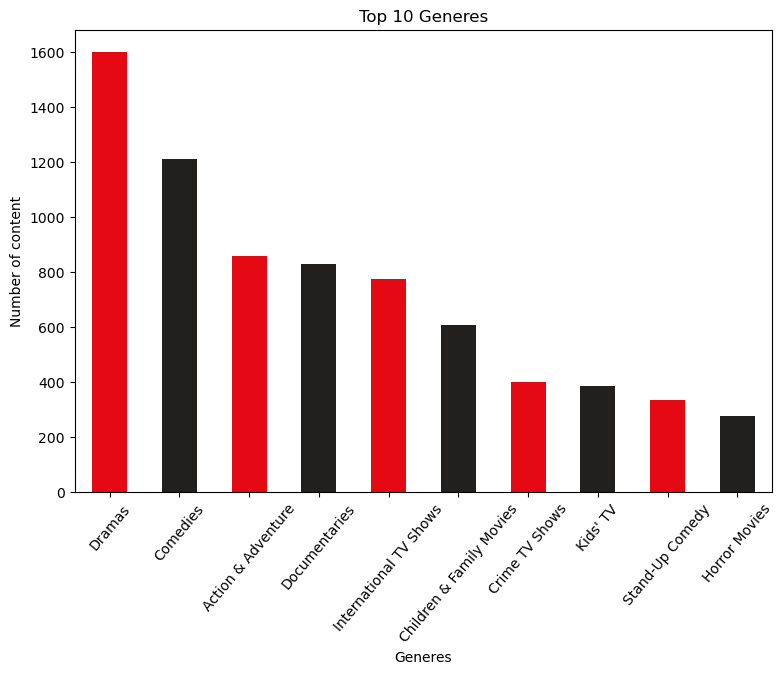

In [168]:
top_generas.head(10).plot(
    kind='bar',
    figsize=(9,6),
    color=['#E50914', '#221F1F']
)
plt.title('Top 10 Generes')
plt.xlabel('Generes')
plt.ylabel('Number of content')
plt.xticks(rotation=50)
plt.show()

### Distributin of Movies and Seasons (Minutes & Hours)

In [29]:
df.groupby('type')[['duration_minutes','seasons']].mean().T


type,Movie,TV Show
duration_minutes,99.577187,NaN
seasons,NaN,1.751313


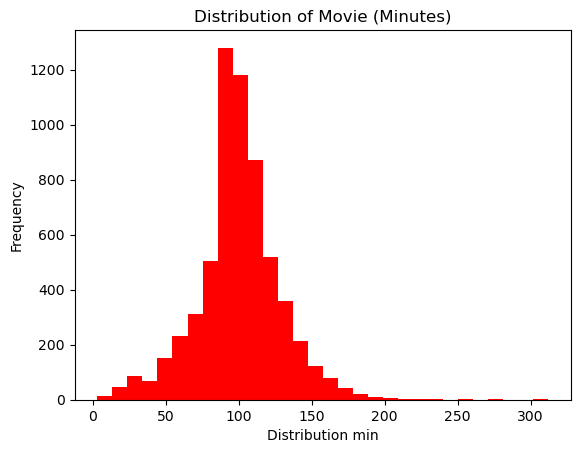

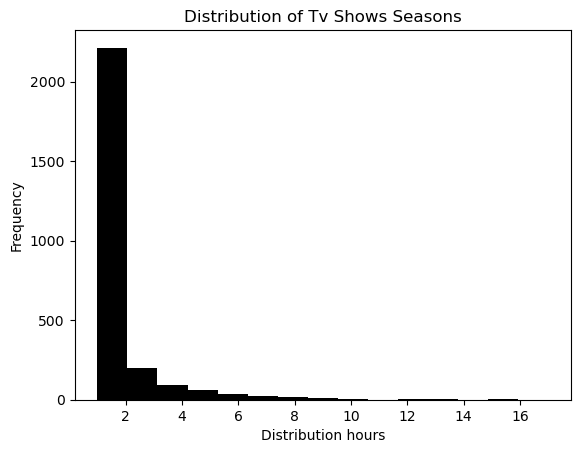

In [30]:
df[df['type']== 'Movie']['duration_minutes'].plot(
    kind='hist',
    bins=30,
    color='Red'    
)
plt.title('Distribution of Movie (Minutes)')
plt.xlabel('Distribution min')

plt.show()

df[df['type']== 'TV Show']['seasons'].plot(
    kind='hist',
    bins=15,
    color='Black',
   )
plt.title('Distribution of Tv Shows Seasons')
plt.xlabel('Distribution hours')

plt.show()

### Top 10 Ratings

In [32]:
top_rating=df['rating'].value_counts().head(10)
top_rating

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64

Text(0, 0.5, '')

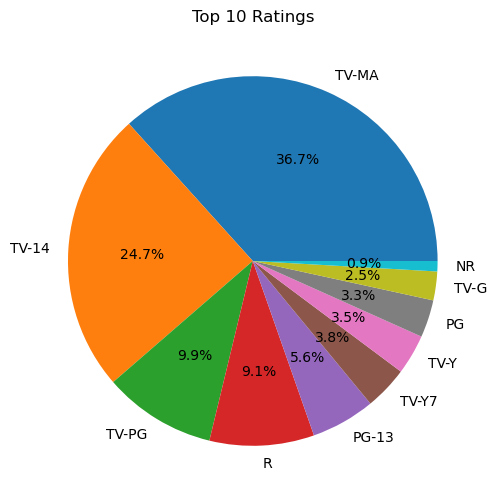

In [42]:
top_rating.head(10).plot(
    kind='pie',
    figsize=(8,6),
    autopct='%1.1f%%'
)
plt.title('Top 10 Ratings')
plt.xlabel('')
plt.ylabel('')

###  Top 10 Directors on Netflix

In [88]:
#Created an empty director list 
list_director = pd.DataFrame()
list_director

""


In [89]:
#it is stored in a stack so that evey director get their own individual rows
list_director = df['director'].str.split(',',expand=True).stack()
list_director.head(10)

0  0    Kirsten Johnson
1  0            unknown
2  0    Julien Leclercq
3  0            unknown
4  0            unknown
5  0      Mike Flanagan
6  0      Robert Cullen
   1     José Luis Ucha
7  0       Haile Gerima
8  0    Andy Devonshire
dtype: object

In [90]:
#now we are putting in a dataframe
list_director= list_director.to_frame()
list_director

,,0
0,0,Kirsten Johnson
1,0,unknown
2,0,Julien Leclercq
3,0,unknown
4,0,unknown
...,...,...
8802,0,David Fincher
8803,0,unknown
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [91]:
#giving a name to column
list_director.columns = ['director']
list_director

,,director
0,0,Kirsten Johnson
1,0,unknown
2,0,Julien Leclercq
3,0,unknown
4,0,unknown
...,...,...
8802,0,David Fincher
8803,0,unknown
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [92]:
# giving a total count of a director and putting in a new list 
top_director = list_director.groupby(['director']).size().reset_index(name='total_count')
top_director

,director,total_count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [93]:
top_director.sort_values(by=['total_count'],ascending = False)

,director,total_count
5108,unknown,2624
4020,Rajiv Chilaka,22
261,Jan Suter,18
4067,Raúl Campos,18
4651,Suhas Kadav,16
...,...,...
2341,J. Lee Thompson,1
2342,J. Michael Long,1
610,Songyos Sugmakanan,1
609,Smriti Keshari,1


In [97]:
final_director = top_director[top_director.director != 'unknown']
final_director

,director,total_count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [120]:
final_director.sort_values(by=['total_count'],ascending=False).head(10)


,director,total_count
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5074,Youssef Chahine,12


Text(0, 0.5, 'Number of Shows')

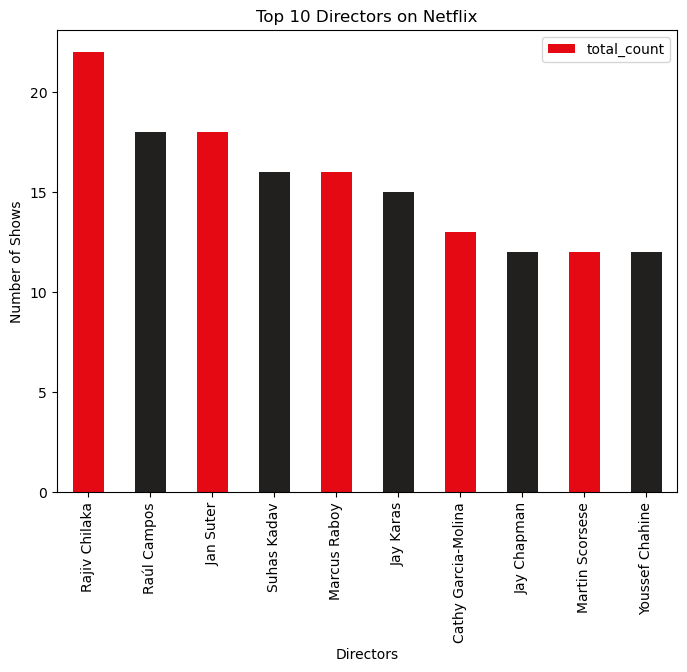

In [119]:
top10 = final_director.sort_values(by=['total_count'],ascending = False).head(10)

top10.plot(
    kind='bar',
    x='director',
    y='total_count',
    color=['#E50914', '#221F1F'],
    figsize=[8,6]
)

plt.title('Top 10 Directors on Netflix')
plt.xlabel('Directors')
plt.ylabel('Number of Shows')


### Top 10 Actors

In [151]:
# Creating empty dataframe
list_cast = pd.DataFrame()
list_cast

""


In [152]:
#storing the cast into new list seprated with comma and putting them in stack 
list_cast = df['cast'].str.split(',',expand = True).stack()
list_cast

0     0                   unknown
1     0                Ama Qamata
      1               Khosi Ngema
      2             Gail Mabalane
      3            Thabang Molaba
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 64882, dtype: object

In [153]:
#storing into data frame 
top_cast = list_cast.to_frame()
top_cast

0
0    0                 unknown
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64882 rows x 1 columns]

In [154]:
top_cast.columns=['actor']
top_cast

actor
0    0                 unknown
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64882 rows x 1 columns]

In [155]:
top_cast = top_cast.groupby(['actor']).size().reset_index(name='total_count')
top_cast

,actor,total_count
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39256,İbrahim Büyükak,1
39257,İbrahim Çelikkol,1
39258,Şahin Irmak,1
39259,Şükrü Özyıldız,1


In [156]:
top_cast.sort_values(by=['total_count'],ascending=False).head(10)

,actor,total_count
39247,unknown,825
2609,Anupam Kher,39
26913,Rupa Bhimani,31
30273,Takahiro Sakurai,30
15526,Julie Tejwani,28
23600,Om Puri,27
25384,Rajesh Kava,26
38410,Shah Rukh Khan,26
23932,Paresh Rawal,25
4182,Boman Irani,25


In [159]:
final_cast = top_cast[top_cast.actor != 'unknown' ]
final_cast

,actor,total_count
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39256,İbrahim Büyükak,1
39257,İbrahim Çelikkol,1
39258,Şahin Irmak,1
39259,Şükrü Özyıldız,1


In [161]:
final_cast = final_cast.sort_values(by=['total_count'],ascending = False)
final_cast

,actor,total_count
2609,Anupam Kher,39
26913,Rupa Bhimani,31
30273,Takahiro Sakurai,30
15526,Julie Tejwani,28
23600,Om Puri,27
...,...,...
28602,Sherif Mounir,1
28585,Shen Yue,1
28603,Sherif Salama,1
35743,Henriette Confurius,1


Text(0, 0.5, 'total counts')

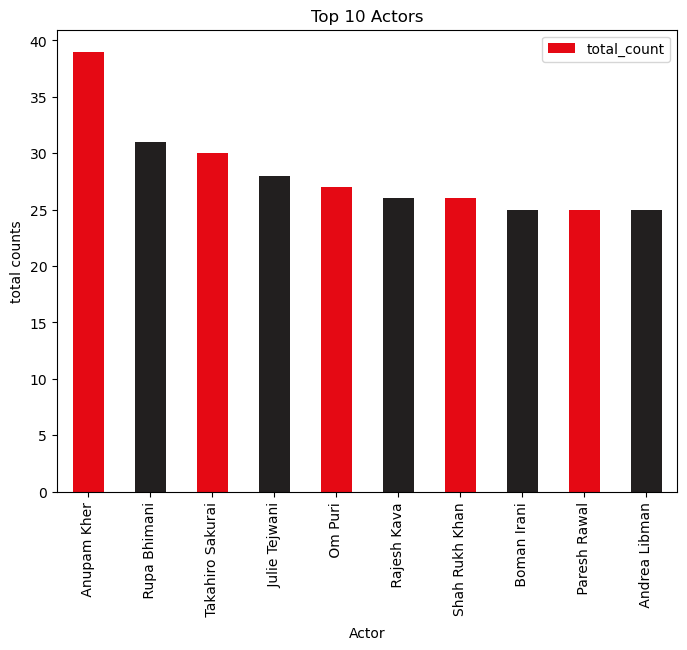

In [166]:
cast10 = final_cast.sort_values(by=['total_count'],ascending = False).head(10)

cast10.plot(
    kind = 'bar',
    x = 'actor',
    y = 'total_count',
    color =['#E50914', '#221F1F'],
    figsize=[8,6]
)

plt.title('Top 10 Actors')
plt.xlabel('Actor')
plt.ylabel('total counts')